In [1]:
import pandas as pd
import torch
import torch.nn as nn

In [2]:
df = pd.read_csv("BostonHousing.csv")
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
x = df.drop('medv', axis=1)
y = df['medv']

In [4]:
x = x.values
y = y.values

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Feature Scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)  # Scaling features

In [6]:
X_scaled = torch.tensor(X_scaled, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)  

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
type(x), type(y), type(X_scaled),type(y_train)

(numpy.ndarray, torch.Tensor, torch.Tensor, torch.Tensor)

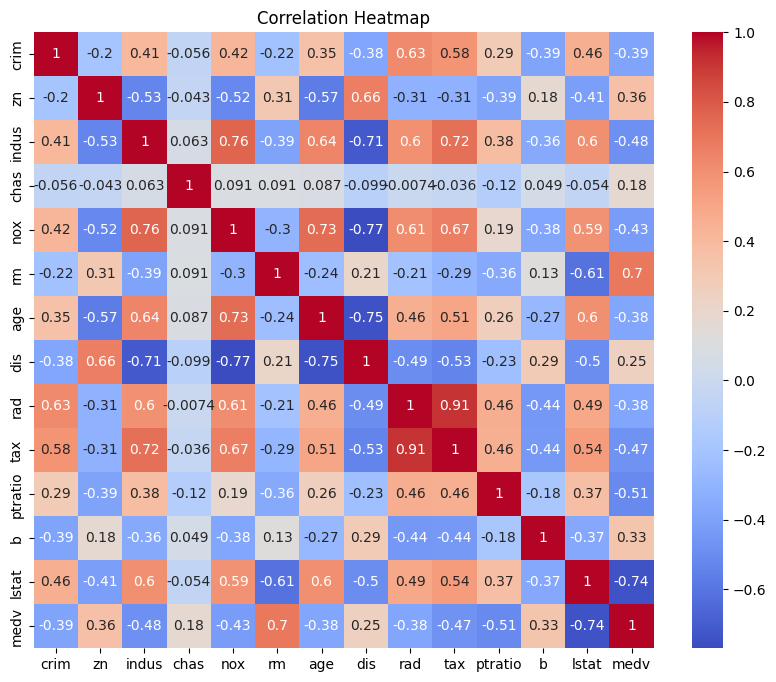

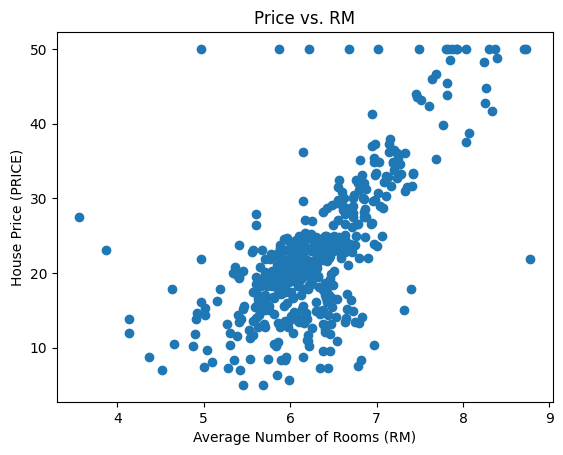

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plot of RM (average number of rooms per dwelling) vs PRICE
plt.scatter(df['rm'], df['medv'])
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('House Price (PRICE)')
plt.title('Price vs. RM')
plt.show()

In [10]:
import torch.nn as nn

# Define a simple Linear Regression model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)  # 1 output, since we are predicting house price
        
    def forward(self, x):
        return self.linear(x)

# Initialize the model
input_dim = X_train.shape[1]
model = LinearRegressionModel(input_dim)

# Loss function (Mean Squared Error)
criterion = nn.MSELoss()

# Optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [11]:
class NeuralNet(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, 1)  # 1 output (price prediction)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Initialize the model
model_nn = NeuralNet(input_dim=input_dim, hidden_dim=64)  # e.g., 64 hidden units
optimizer_nn = torch.optim.Adam(model_nn.parameters(), lr=0.001)

In [12]:
# Train the Linear Regression Model
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    
    # Forward pass: Compute prediction
    y_pred_train = model(X_train)
    
    # Compute loss
    loss = criterion(y_pred_train, y_train)
    
    # Backward pass: Compute gradient and update the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print loss every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 32.7942
Epoch [200/1000], Loss: 22.7719
Epoch [300/1000], Loss: 22.2169
Epoch [400/1000], Loss: 22.0088
Epoch [500/1000], Loss: 21.8899
Epoch [600/1000], Loss: 21.8166
Epoch [700/1000], Loss: 21.7689
Epoch [800/1000], Loss: 21.7363
Epoch [900/1000], Loss: 21.7132
Epoch [1000/1000], Loss: 21.6963


In [13]:
# Train the Neural Network Model
num_epochs = 1000
for epoch in range(num_epochs):
    model_nn.train()
    
    # Forward pass: Compute prediction
    y_pred_train = model_nn(X_train)
    
    # Compute loss
    loss = criterion(y_pred_train, y_train)
    
    # Backward pass: Compute gradient and update the weights
    optimizer_nn.zero_grad()
    loss.backward()
    optimizer_nn.step()
    
    # Print loss every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], NN Loss: {loss.item():.4f}')

Epoch [100/1000], NN Loss: 440.2450
Epoch [200/1000], NN Loss: 155.4474
Epoch [300/1000], NN Loss: 51.4648
Epoch [400/1000], NN Loss: 29.6918
Epoch [500/1000], NN Loss: 24.6115
Epoch [600/1000], NN Loss: 21.3409
Epoch [700/1000], NN Loss: 18.6789
Epoch [800/1000], NN Loss: 16.4260
Epoch [900/1000], NN Loss: 14.4576
Epoch [1000/1000], NN Loss: 12.9629


In [14]:
model.eval()  # Set to evaluation mode
with torch.no_grad():  # No need to track gradients
    y_pred_test = model(X_test)
    test_loss = criterion(y_pred_test, y_test)
    for i in range(len(y_pred_test)):
        print(f"y_eval: {y_pred_test[i].item()}, y_test: {y_test[i]}, diff: {y_pred_test[i].item() - y_test[i]}.")
    rmse = torch.sqrt(test_loss)
    print(f'Linear Regression Test RMSE: {rmse.item():.4f}')

y_eval: 28.986230850219727, y_test: tensor([23.6000]), diff: tensor([5.3862]).
y_eval: 35.824256896972656, y_test: tensor([32.4000]), diff: tensor([3.4243]).
y_eval: 15.876232147216797, y_test: tensor([13.6000]), diff: tensor([2.2762]).
y_eval: 25.012123107910156, y_test: tensor([22.8000]), diff: tensor([2.2121]).
y_eval: 18.709047317504883, y_test: tensor([16.1000]), diff: tensor([2.6090]).
y_eval: 23.42138671875, y_test: tensor([20.]), diff: tensor([3.4214]).
y_eval: 17.687292098999023, y_test: tensor([17.8000]), diff: tensor([-0.1127]).
y_eval: 14.569202423095703, y_test: tensor([14.]), diff: tensor([0.5692]).
y_eval: 22.811012268066406, y_test: tensor([19.6000]), diff: tensor([3.2110]).
y_eval: 20.835777282714844, y_test: tensor([16.8000]), diff: tensor([4.0358]).
y_eval: 24.673608779907227, y_test: tensor([21.5000]), diff: tensor([3.1736]).
y_eval: 18.668699264526367, y_test: tensor([18.9000]), diff: tensor([-0.2313]).
y_eval: -6.0367584228515625, y_test: tensor([7.]), diff: tenso

In [15]:
# Evaluation on test data (Neural Network)
model_nn.eval()
with torch.no_grad():
    y_pred_test_nn = model_nn(X_test)
    test_loss_nn = criterion(y_pred_test_nn, y_test)
    for i in range(len(y_pred_test_nn)):
        print(f"y_eval: {y_pred_test_nn[i].item()}, y_test: {y_test[i]}, diff: {y_pred_test_nn[i].item() - y_test[i]}.")
    rmse_nn = torch.sqrt(test_loss_nn)
    print(f'Neural Network Test RMSE: {rmse_nn.item():.4f}')

y_eval: 27.767778396606445, y_test: tensor([23.6000]), diff: tensor([4.1678]).
y_eval: 32.84233856201172, y_test: tensor([32.4000]), diff: tensor([0.4423]).
y_eval: 20.794193267822266, y_test: tensor([13.6000]), diff: tensor([7.1942]).
y_eval: 26.804494857788086, y_test: tensor([22.8000]), diff: tensor([4.0045]).
y_eval: 17.035263061523438, y_test: tensor([16.1000]), diff: tensor([0.9353]).
y_eval: 20.40228843688965, y_test: tensor([20.]), diff: tensor([0.4023]).
y_eval: 15.010294914245605, y_test: tensor([17.8000]), diff: tensor([-2.7897]).
y_eval: 13.48086166381836, y_test: tensor([14.]), diff: tensor([-0.5191]).
y_eval: 23.17725372314453, y_test: tensor([19.6000]), diff: tensor([3.5773]).
y_eval: 16.25336456298828, y_test: tensor([16.8000]), diff: tensor([-0.5466]).
y_eval: 21.751712799072266, y_test: tensor([21.5000]), diff: tensor([0.2517]).
y_eval: 16.13011932373047, y_test: tensor([18.9000]), diff: tensor([-2.7699]).
y_eval: 7.30118989944458, y_test: tensor([7.]), diff: tensor([

In [16]:
# Extract the learned coefficients (Linear Regression)
coefficients = model.linear.weight.detach().numpy().flatten()
features = df.columns[:-1]  # All feature names

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
importance_df = importance_df.sort_values(by='Coefficient', ascending=False)

print(importance_df)

    Feature  Coefficient
5        rm     3.174603
8       rad     1.679108
11        b     1.125578
3      chas     0.734035
1        zn     0.580775
2     indus     0.081347
6       age    -0.194943
0      crim    -0.919497
9       tax    -1.144539
4       nox    -1.897222
10  ptratio    -1.950546
7       dis    -2.953821
12    lstat    -3.604562


In [17]:
class DecisionTreeRegressor:
    def __init__(self, max_depth=10, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    # Recursive function to find the best split
    def fit(self, X, y, depth=0):
        n_samples, n_features = X.shape
        if depth >= self.max_depth or n_samples < self.min_samples_split:
            return torch.mean(y)
        
        best_split = self._get_best_split(X, y, n_features)
        if not best_split:
            return torch.mean(y)
        
        left_idx, right_idx = best_split['left_idx'], best_split['right_idx']
        left_tree = self.fit(X[left_idx], y[left_idx], depth + 1)
        right_tree = self.fit(X[right_idx], y[right_idx], depth + 1)
        return {'split_feature': best_split['split_feature'], 'split_threshold': best_split['split_threshold'], 
                'left_tree': left_tree, 'right_tree': right_tree}

    def _get_best_split(self, X, y, n_features):
        best_mse = float('inf')
        best_split = None
        for feature_idx in range(n_features):
            thresholds = torch.unique(X[:, feature_idx])
            for threshold in thresholds:
                left_idx = torch.where(X[:, feature_idx] <= threshold)[0]
                right_idx = torch.where(X[:, feature_idx] > threshold)[0]
                if len(left_idx) == 0 or len(right_idx) == 0:
                    continue
                mse = self._calculate_mse(y[left_idx], y[right_idx])
                if mse < best_mse:
                    best_mse = mse
                    best_split = {'split_feature': feature_idx, 'split_threshold': threshold, 'left_idx': left_idx, 'right_idx': right_idx}
        return best_split
    
    def _calculate_mse(self, left_y, right_y):
        mse = 0
        for group in [left_y, right_y]:
            if len(group) > 0:
                mse += torch.mean((group - torch.mean(group)) ** 2)
        return mse

    def predict(self, X):
        return torch.tensor([self._predict_tree(x, self.tree) for x in X])

    def _predict_tree(self, x, tree):
        if not isinstance(tree, dict):
            return tree
        feature_idx = tree['split_feature']
        if x[feature_idx] <= tree['split_threshold']:
            return self._predict_tree(x, tree['left_tree'])
        else:
            return self._predict_tree(x, tree['right_tree'])

In [18]:
class RandomForestRegressor:
    def __init__(self, n_trees=10, max_depth=10, min_samples_split=2):
        self.n_trees = n_trees
        self.trees = [DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split) for _ in range(n_trees)]

    def fit(self, X, y):
        for tree in self.trees:
            # Sample with replacement (bagging)
            indices = torch.randint(0, X.shape[0], (X.shape[0],))
            X_sample, y_sample = X[indices], y[indices]
            tree.tree = tree.fit(X_sample, y_sample)

    def predict(self, X):
        predictions = torch.stack([tree.predict(X) for tree in self.trees], dim=0)
        return torch.mean(predictions, dim=0)

In [19]:
class GradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_split=2):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.trees = [DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split) for _ in range(n_estimators)]

    def fit(self, X, y):
        self.initial_prediction = torch.mean(y)
        residual = y - self.initial_prediction
        
        for tree in self.trees:
            tree.tree = tree.fit(X, residual)
            residual -= self.learning_rate * tree.predict(X)

    def predict(self, X):
        prediction = torch.full((X.shape[0],), self.initial_prediction)
        for tree in self.trees:
            prediction += self.learning_rate * tree.predict(X)
        return prediction


In [23]:
def model_predict(data_as_numpy):
    data_as_tensor = torch.tensor(data_as_numpy, dtype=torch.float32)
    with torch.no_grad():
        return model(data_as_tensor).numpy()

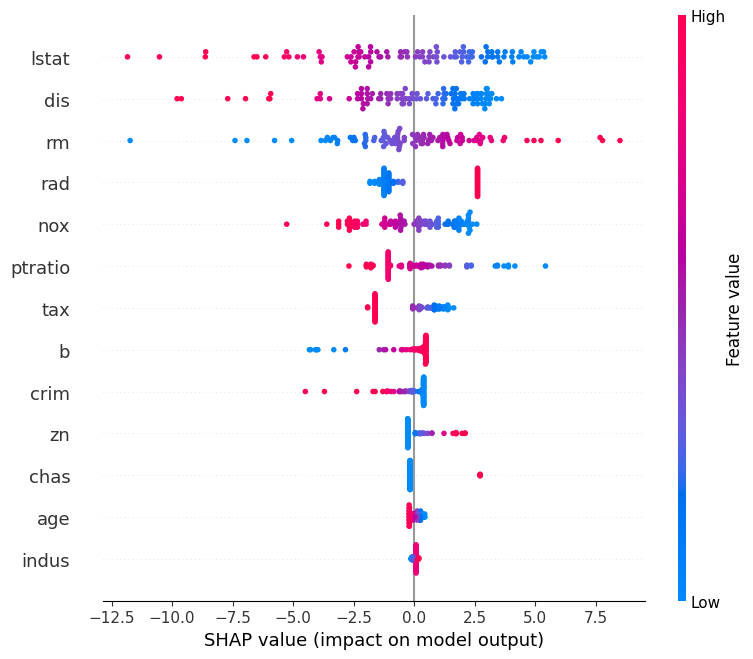

In [25]:
import shap

explainer = shap.Explainer(model_predict, masker=X_test.numpy())

shap_values = explainer.shap_values(X_test.numpy())

# Plot summary
shap.summary_plot(shap_values, X_test, feature_names=features)